# Salary Prediction Using Random Forest Using Regression

## Table of Content

  ###  1. What is Random Forest Regression?
  ###  2. Importing Libraries
  ###  3. Loading Dataset
  ###  4. Data PreProcessing
  ###  5. Feature Scaling
  ###  6. EDA
  ###  7. Data Splitting
  ###  8. Model Selection and Training
  ###  9. Model Evaluation
  ### 10. Conclusion

## 1. What is Random Forest Regression?

### Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

    n_estimators — the number of decision trees you will be running in the model
    criterion — this variable allows you to select the criterion (loss function) used to determine model outcomes. We can select from loss functions such as mean squared error (MSE) and mean absolute error (MAE). The default value is MSE.
    max_depth — this sets the maximum possible depth of each tree
    max_features — the maximum number of features the model will consider when determining a split
    bootstrap — the default value for this is True, meaning the model follows bootstrapping principles (defined    earlier)
    max_samples — This parameter assumes bootstrapping is set to True, if not, this parameter doesn’t apply. In the case of True, this value sets the largest size of each sample for each tree.

![](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)

## Why use Random Forest?

### It takes less training time as compared to other algorithms.
### It predicts output with high accuracy, even for the large dataset it runs efficiently.
### It can also maintain accuracy when a large proportion of data is missing.

## 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 3. Loading Dataset

In [2]:
Salary_data = pd.read_csv('Salary_dataset.csv')
Salary_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
Salary_data.shape

(30, 3)

In [4]:
Salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


## 4. Data Preprocessing

In [5]:
Salary_data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
# remove the unnecessary feature
del Salary_data['Unnamed: 0']

In [7]:
Salary_data['Salary'].unique()

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [8]:
Salary_data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [9]:
Salary_data['YearsExperience'].value_counts()

3.3     2
4.1     2
1.2     1
5.4     1
10.4    1
9.7     1
9.6     1
9.1     1
8.8     1
8.3     1
8.0     1
7.2     1
6.9     1
6.1     1
6.0     1
5.2     1
1.4     1
5.0     1
4.6     1
4.2     1
4.0     1
3.8     1
3.1     1
3.0     1
2.3     1
2.1     1
1.6     1
10.6    1
Name: YearsExperience, dtype: int64

In [10]:
Salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


## 5. Feature Scalling

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Salary_data[['YearsExperience', 'Salary']],
                                                    Salary_data.YearsExperience, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((21, 2), (9, 2))

In [12]:
#Feature Scaling Using Standard Scaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [13]:
print('mean value of Years of Experience and Salary features: ', X_train_scaled.mean(axis=0))
print('std value of Years of Experience and Salary features: ', X_test_scaled.std(axis=0))

mean value of Years of Experience and Salary features:  [-1.03092138e-16  2.32618158e-16]
std value of Years of Experience and Salary features:  [1.18482031 1.21679385]


(array([4., 1., 5., 3., 0., 1., 2., 2., 1., 2.]),
 array([-1.34168561, -1.00737597, -0.67306632, -0.33875667, -0.00444702,
         0.32986263,  0.66417227,  0.99848192,  1.33279157,  1.66710122,
         2.00141086]),
 <BarContainer object of 10 artists>)

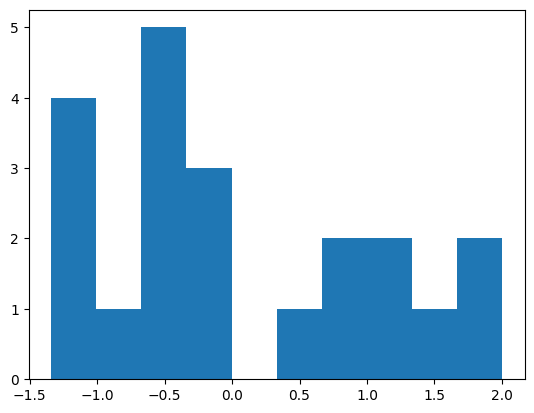

In [14]:
# the distribution of the transformed variable Age

plt.hist(X_train_scaled[:,1])

## 6. EDA

In [17]:
Salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


/var/folders/zd/ztbp2s155xg8jw7f449v64440000gn/T/ipykernel_14675/354977572.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Salary_data['Salary'], bins=10, label = 'Salary', color='purple')


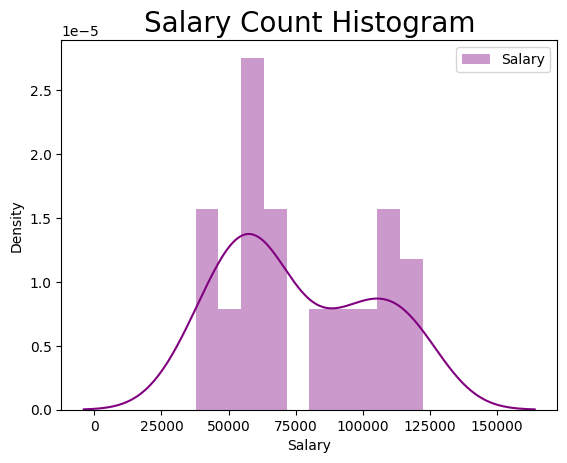

In [20]:
f, ax = plt.subplots(1,1)
sns.distplot(Salary_data['Salary'], bins=10, label = 'Salary', color='purple')

ax.set_title('Salary Count Histogram', fontsize=20) 

ax.set(xlabel='Salary')

ax.legend()
plt.show()

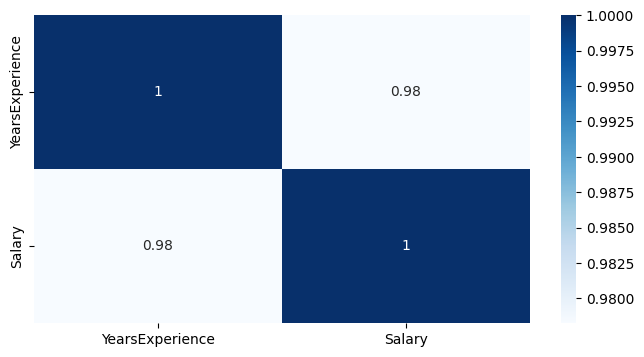

In [21]:
plt.figure(figsize=(8,4)) 
sns.heatmap(Salary_data.corr(), annot = True, cmap = "Blues")
plt.show()

## 7. Data Splitting

In [22]:
Salary_data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [23]:
X = Salary_data[['YearsExperience']]
Y = Salary_data['Salary']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=.2)

In [25]:
print('x_train:', X_train.shape)
print('x_test: ', X_test.shape)
print('y_train:', Y_train.shape)
print('y_test: ', Y_test.shape)

x_train: (24, 1)
x_test:  (6, 1)
y_train: (24,)
y_test:  (6,)


## 8. Model Selection and Training

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# score = []
# for i in range(1,51):
#     clf = RandomForestRegressor(criterion = 'absolute_error', n_estimators = i)
#     clf.fit(X_train, Y_train)
#     scores = clf.score(X_test, Y_test)
#     score.append(scores)

In [40]:
model = RandomForestRegressor(criterion='absolute_error', n_estimators=30)
model.fit(X_train, Y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=30)

## 9. Model Evaluation

In [42]:
model.score(X_test, Y_test)*100

98.10700977923945

In [43]:
predict = model.predict(X_test)
predict

array([ 43844.86666667, 118631.7       ,  56530.43333333,  56530.43333333,
       112692.1       , 106557.36666667])

In [45]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error: ', mean_absolute_error(predict, Y_test))

Mean Absolute Error:  4044.3055555555547


In [46]:
from sklearn.metrics import mean_squared_error

print('Mean Squared Error: ', mean_squared_error(Y_test, predict))

Mean Squared Error:  20518681.67129629


In [48]:
from sklearn.metrics import mean_squared_log_error

print('Mean Squared Log Error: ', mean_squared_log_error(Y_test, predict,squared=False))

Mean Squared Log Error:  0.07980497394694086


In [50]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, predict)
print('R2 Score: ', r2)

R2 Score:  0.9810700977923945


In [52]:
n = 60 
k = 10  

r2 = r2_score(Y_test, predict)  #r2 = r square score

adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print('Adjusted R2 Score: ', adj_r2_score)

Adjusted R2 Score:  0.9772068524439036


In [56]:
from sklearn.metrics import mean_squared_error
import math

print('RMSE: ', math.sqrt(mean_squared_error(Y_test, predict)))

RMSE:  4529.755144739756


## 10. Conclusion

### In this Project, I've salary Data and Analysis of Salary through year of experience. And trained and evaluate model using random forest regression and evaluate using MAE, MEA, RMSE etc.